En aquest arxiu es mostra un anàlisi descriptiu per a les dades que el valor de *NHab* és superior a 46. 

**ÍNDEX**
1. Passos previs
    * Importar paquets
    * Funcions
    * Càrrega de dades
2. Anàlisi descriptiu
    * Variable objectiu
    * Variables categòriques
    * Variables numèriques
3. Conclusions de l'apartat

# Passos previs

## Importar

In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import locale
import matplotlib
import matplotlib.pyplot as plt
import re
%matplotlib inline
matplotlib.style.use('ggplot')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows', None)

## Càrrega de dades

In [2]:
mainpath = "C:/Users/miquel.vallverdu/Desktop/Miquel/TFG/Repos/Bismart-P19824-PrediccionOcupacionHoteles_TFG_MVallverdu/dataset/"
#mainpath = "C:/Users/Miquel/Desktop/Miquel/Estudis/ESTADISTICA/TFG/"

df1 = pd.read_csv(mainpath + "dfextNH.csv", sep = ",")
df1.diaAño = df1.diaAño.asobject

C:\Users\miquel.vallverdu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 'asobject' is deprecated. Use 'astype(object)' instead
  """


In [3]:
df1.head()
df1.shape

,idhotel,fechaocupacion,idcliente,idtipohab,idregimen,idsegmento,id_canal,idpais_cliente,NHab,S1H,S2H,S3H,S4H,S5H,S6H,S7H,S8H,S9H,S10H,S11H,S12H,S13H,S14H,S15H,S16H,S17H,S18H,S19H,S20H,S21H,S22H,S23H,S24H,S25H,S26H,S27H,S28H,S29H,S30H,S31H,S32H,S33H,S34H,S35H,S36H,S37H,S38H,S39H,S40H,S41H,S42H,S43H,S44H,S45H,S46H,S47H,S48H,S49H,S50H,S51H,S52H,PreuHab,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18,S19,S20,S21,S22,S23,S24,S25,S26,S27,S28,S29,S30,S31,S32,S33,S34,S35,S36,S37,S38,S39,S40,S41,S42,S43,S44,S45,S46,S47,S48,S49,S50,S51,S52,diaAño
0,AVS,2018-03-28,OL_MEDITERRANEO,SUI,PC,VACAC,DESCONOCIDO,ES,170,170,164,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60.507701,60.507701,60.641685,61.626811,61.626811,61.626811,61.626811,61.626811,61.626811,61.626811,61.626811,61.626811,61.626811,61.626811,61.626811,61.626811,61.626811,61.626811,61.626811,61.626811,61.626811,61.626811,61.626811,61.626811,61.626811,61.626811,61.626811,61.626811,61.626811,61.626811,61.626811,61.626811,61.626811,61.626811,61.626811,61.626811,61.626811,61.626811,61.626811,61.626811,61.626811,61.626811,61.626811,61.626811,61.626811,61.626811,61.626811,61.626811,61.626811,61.626811,61.626811,61.626811,61.626811,87
1,TOS,2018-03-29,Huespedes,DBL,PC,DESCONOCIDO,DESCONOCIDO,ES,50,43,38,34,27,16,9,5,5,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,132.749145,131.154609,136.163229,134.323609,133.601785,140.094489,151.445758,158.140547,158.140547,140.758487,140.758487,140.758487,140.758487,140.758487,140.758487,140.758487,140.758487,140.758487,140.758487,140.758487,140.758487,140.758487,134.496138,134.496138,204.199999,204.199999,204.199999,204.199999,204.199999,204.199999,204.199999,204.199999,204.199999,204.199999,204.199999,204.199999,204.199999,204.199999,204.199999,204.199999,204.199999,204.199999,204.199999,204.199999,204.199999,204.199999,204.199999,204.199999,204.199999,204.199999,204.199999,204.199999,204.199999,88
2,PAV,2018-03-29,Huespedes,DBL,MP,DESCONOCIDO,DESCONOCIDO,ES,85,75,66,57,51,53,43,31,26,21,18,16,15,13,13,12,12,12,10,11,8,7,7,7,5,3,3,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,112.893850,113.756667,112.792218,112.574243,110.947947,115.162688,117.390798,115.195005,118.199822,121.180512,118.269184,123.123286,124.135748,128.087756,128.087756,129.928403,129.928403,129.928403,128.684992,125.249574,134.439772,133.202596,133.202596,133.202596,126.038181,103.978787,103.978787,76.404545,85.309090,85.309090,85.309090,85.309090,85.309090,85.309090,85.309090,85.309090,85.309090,85.309090,85.309090,85.309090,85.309090,85.309090,85.309090,85.309090,85.309090,85.309090,85.309090,85.309090,85.309090,85.309090,85.309090,85.309090,85.309090,88
3,PAV,2018-03-29,Huespedes,DBL,PC,DESCONOCIDO,DESCONOCIDO,ES,59,58,57,59,54,54,51,45,38,35,32,25,19,18,18,18,18,16,15,11,11,8,8,7,3,2,3,3,3,2,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,134.319414,134.900156,131.192232,130.090693,132.349259,133.075690,131.896185,135.229414,143.962990,141.651766,141.904631,136.922291,133.534593,132.531465,132.531465,132.531465,132.531465,127.689375,128.190485,130.274628,130.274628,128.066251,128.066251,129.831559,151.460606,136.495454,159.063636,159.063636,159.063636,175.622727,175.622727,204.199999,204.199999,204.199999,204.199999,204.199999,204.199999,204.199999,204.199999,204.199999,204.199999,204.199999,204.199999,204.199999,204.199999,204.199999,204.199999,204.199999,204.199999,204.199999,204.199999,204.199999,204.199999,88
4,AVS,2018-03-29,OL_MEDITERRANEO,SUI,PC,VACAC,DESCONOCIDO,ES,172,170,164,59,0,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60.645138,60.819145,60.667628,62.476117,62.476117,62.476117,45.854546,45.854546,45.854546,45.854546,45.854546,45.854546,45.854546,45.854546,45.854546,45.854546,45.854546,45.854546,45.854546,45.854546,45.854546,45.854546,45.854546,45.854546,45.854546,45.854546,45.854546,45.854546,

(2260, 115)

## Funcions

In [5]:
def habitacionsPerCategoria(categoria, df):
    cat = []
    habCat = []
    pHabCat = []
    for c in categoria.unique():
        cat.append(c) ## llista amb els valors unics de la categoria
        habCat.append(sum(df[categoria==c]['NHab'])) ## suma d'habitacions
        pHabCat.append(round(sum(df[categoria==c]['NHab'])*100/sum(df['NHab']),3)) ## percentatges
    return pd.DataFrame(list(zip(cat, habCat, pHabCat)), columns = ['id', 'Total habitacions', 'Percentatge %'])

In [6]:
def filtroMenorQue5(lista):
    if(lista < 5):
        return True
    else:
        return False

In [7]:
def llistaHotel(hotel, df):
    l = list(df[df['idhotel']==hotel]['NHab'])
    return l

# Anàlisi descriptiu

## Variable objectiu

In [8]:
df1['NHab'].describe()

count    2260.000000
mean       72.819027
std        32.875171
min        47.000000
25%        54.000000
50%        64.000000
75%        82.000000
max       346.000000
Name: NHab, dtype: float64

#### Histogrames

Text(0.5, 1.0, "Número d'habitacions ocupades")

Text(0.5, 0, 'Habitacions')

Text(0, 0.5, 'Recompte')

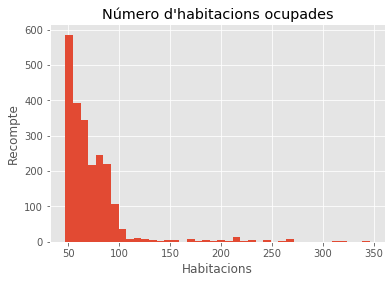

In [9]:
plt.title("Número d'habitacions ocupades")
plt.xlabel('Habitacions')
plt.ylabel('Recompte')
plt.show(plt.hist(df1['NHab'], bins = 40))


#df1[df1['NHab']<40]['NHab']

#### Distribució

Text(0.5, 1.0, "Distribució Número d'habitacions")

Text(0.5, 0, "Número d'habitacions")

Text(0, 0.5, 'Densitat')

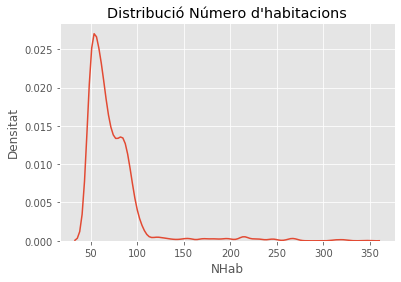

In [10]:
plt.title("Distribució Número d'habitacions")
plt.xlabel("Número d'habitacions")
plt.ylabel("Densitat")
plt.show(sns.distplot(df1.NHab, hist = False))


#### Boxplots

Text(0.5, 1.0, "Boxplot Número d'habitacions")

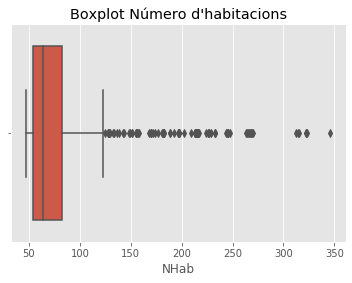

In [11]:
plt.title("Boxplot Número d'habitacions")
plt.show(sns.boxplot(x = df1['NHab']))


## Variables categòriques

### Hotel

#### Anàlisi univariat

In [12]:
df1.idhotel.unique()

array(['AVS', 'TOS', 'PAV', 'DON', 'TAU'], dtype=object)

Text(0.5, 1.0, 'ID hotel')

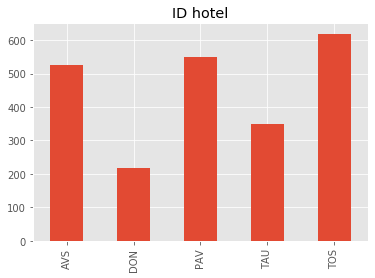

In [13]:
plt.title('ID hotel')
plt.show(df1['idhotel'].value_counts().sort_index().plot.bar())


In [14]:
h = pd.concat([df1['idhotel'].value_counts().sort_index()/len(df1)*100, 
                df1['idhotel'].value_counts().sort_index()], axis = 1)
h.columns = ['%', 'Recompte']
h.sort_values(by=['Recompte'], ascending = False)


,%,Recompte
TOS,27.389381,619
PAV,24.336283,550
AVS,23.185841,524
TAU,15.398230,348
DON,9.690265,219



#### Anàlisi bivariat

Text(0.5, 1.0, "Boxplot de nombre d'habitacions per hotel")

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

Text(0.5, 0, 'Hotel')

Text(0, 0.5, 'Nº Habitacions')

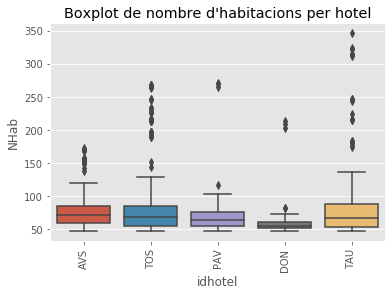

In [15]:
plt.title("Boxplot de nombre d'habitacions per hotel")
plt.xticks(rotation = 90)
plt.xlabel("Hotel")
plt.ylabel("Nº Habitacions")
plt.show(sns.boxplot(x="idhotel", y="NHab", data=df1))

### Client

#### Anàlisi univariat

Text(0.5, 1.0, 'ID client')

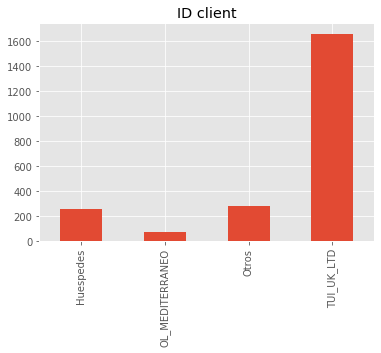

In [16]:
plt.title('ID client')
plt.show(df1['idcliente'].value_counts().sort_index().plot.bar())



In [17]:
cl = pd.concat([df1['idcliente'].value_counts().sort_index()/len(df1)*100, 
                df1['idcliente'].value_counts().sort_index()], axis = 1)
cl.columns = ['%', 'Recompte']
cl.sort_values(by=['Recompte'], ascending = False)


,%,Recompte
TUI_UK_LTD,73.539823,1662
Otros,12.389381,280
Huespedes,11.106195,251
OL_MEDITERRANEO,2.964602,67


#### Anàlisi bivariat

Text(0.5, 1.0, "Boxplots del nombre d'habitacions segons el client")

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

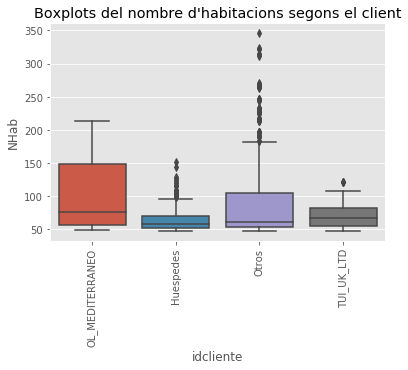

In [18]:
plt.title("Boxplots del nombre d'habitacions segons el client")
plt.xticks(rotation = 90)
plt.show(sns.boxplot(x = 'idcliente', y = 'NHab', data = df1))



### Tipus Habitació


#### Anàlisi univariat

Text(0.5, 1.0, "Tipus d'habitació")

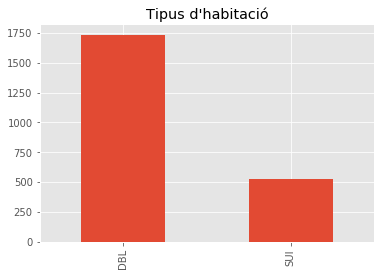

In [19]:
plt.title("Tipus d'habitació")
plt.show(df1['idtipohab'].value_counts().sort_index().plot.bar())


In [20]:
hab = pd.concat([df1['idtipohab'].value_counts().sort_index()/len(df1)*100, 
                df1['idtipohab'].value_counts().sort_index()], axis = 1)
hab.columns = ['%', 'Recompte']
hab.sort_values(by=['Recompte'], ascending = False)



,%,Recompte
DBL,76.814159,1736
SUI,23.185841,524


#### Anàlisi bivariat

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons tipus d'habitació")

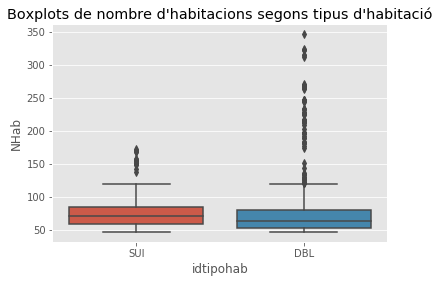

In [21]:
plt.title("Boxplots de nombre d'habitacions segons tipus d'habitació")
plt.show(sns.boxplot(x="idtipohab", y="NHab", data=df1))


##### Comportament de idtiohab amb idhotel

S'analitza el tipus d'habitació que ven cada hotel

In [22]:
hotelHab = pd.crosstab(df1.idhotel, df1.idtipohab, margins = True, margins_name = 'Total')
hotelHab


idtipohab,DBL,SUI,Total
idhotel,,,
AVS,0,524,524
DON,219,0,219
PAV,550,0,550
TAU,348,0,348
TOS,619,0,619
Total,1736,524,2260


### Règim

#### Anàlisi univariat

Text(0.5, 1.0, 'Règim')

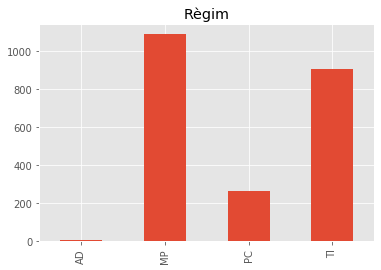

In [23]:
plt.title('Règim')
plt.show(df1['idregimen'].value_counts().sort_index().plot.bar())




In [24]:
r = pd.concat([df1['idregimen'].value_counts().sort_index()/len(df1)*100, 
                df1['idregimen'].value_counts().sort_index()], axis = 1)
r.columns = ['%', 'Recompte']
r.sort_values(by=['Recompte'], ascending = False)


,%,Recompte
MP,48.097345,1087
TI,40.000000,904
PC,11.592920,262
AD,0.309735,7


#### Anàlisi bivariat 

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons tipus de règim")

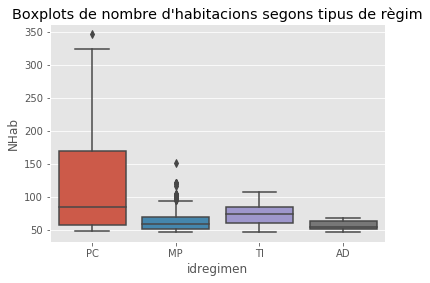

In [25]:
plt.title("Boxplots de nombre d'habitacions segons tipus de règim")
plt.show(sns.boxplot(x="idregimen", y="NHab", data=df1))



### Segment

#### Anàlisi univariat

Text(0.5, 1.0, 'Segment')

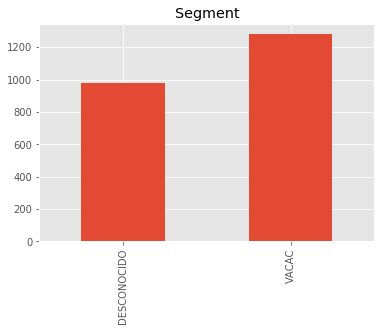

In [26]:
plt.title("Segment")
plt.show(df1['idsegmento'].value_counts().sort_index().plot.bar())




In [27]:
s = pd.concat([df1['idsegmento'].value_counts().sort_index()/len(df1)*100, 
                df1['idsegmento'].value_counts().sort_index()], axis = 1)
s.columns = ['%', 'Recompte']
s.sort_values(by=['Recompte'], ascending = False)


,%,Recompte
VACAC,56.637168,1280
DESCONOCIDO,43.362832,980


In [28]:
df1[df1['idcliente']=='TUI_UK_LTD'].idsegmento.describe()

count      1662
unique        2
top       VACAC
freq       1213
Name: idsegmento, dtype: object

Aproximadament un 75% de les dades que la variable *idcliente* és *TUI_UK_LTD*, l'*idsegmento* és vacacional.

#### Anàlisi bivariat

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons segment")

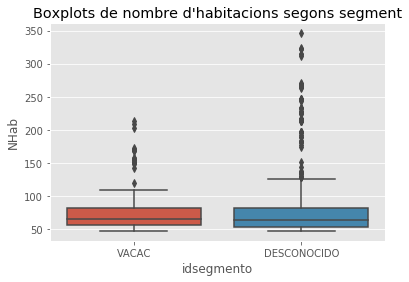

In [29]:
plt.title("Boxplots de nombre d'habitacions segons segment")
plt.show(sns.boxplot(x="idsegmento", y="NHab", data=df1))


### Canal

#### Anàlisi univariat

Text(0.5, 1.0, 'Canal')

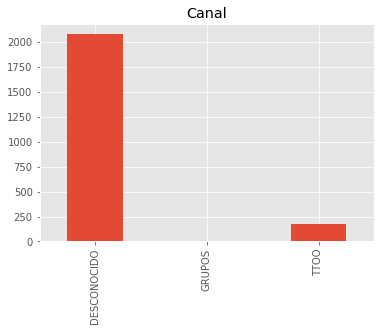

In [30]:
plt.title("Canal")
plt.show(df1['id_canal'].value_counts().sort_index().plot.bar())




In [31]:
c = pd.concat([df1['id_canal'].value_counts().sort_index()/len(df1)*100, 
               df1['id_canal'].value_counts().sort_index()], axis = 1)
c.columns = ['%', 'Recompte']
c.sort_values(by=['Recompte'], ascending = False)


,%,Recompte
DESCONOCIDO,91.946903,2078
TTOO,7.831858,177
GRUPOS,0.221239,5



#### Anàlisi bivariat

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons canal")

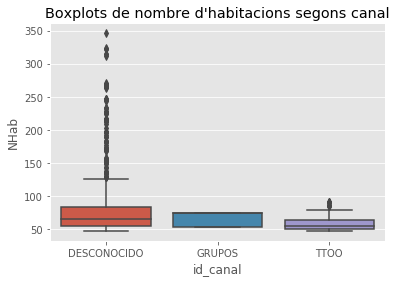

In [32]:
plt.title("Boxplots de nombre d'habitacions segons canal")
plt.show(sns.boxplot(x="id_canal", y="NHab", data=df1))



### País client

#### Anàlisi univariat

Text(0.5, 1.0, "País de l'agència client")

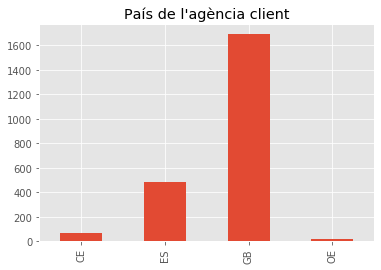

In [33]:
plt.title("País de l'agència client")
plt.show(df1['idpais_cliente'].value_counts().sort_index().plot.bar())



In [34]:
pc = pd.concat([df1['idpais_cliente'].value_counts().sort_index()/len(df1)*100, 
           df1['idpais_cliente'].value_counts().sort_index()], axis = 1)
pc.columns = ['%', 'Recompte']
pc.sort_values(by = 'Recompte', ascending = False)


,%,Recompte
GB,74.867257,1692
ES,21.415929,484
CE,3.097345,70
OE,0.619469,14


#### Anàlisi bivariat

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons el país de l'agència client")

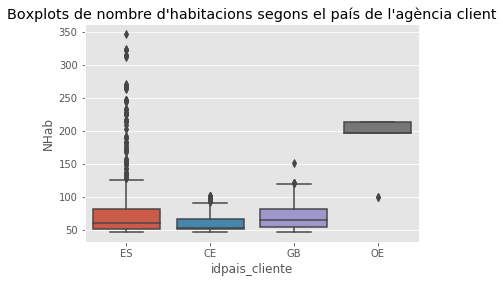

In [35]:
plt.title("Boxplots de nombre d'habitacions segons el país de l'agència client")
plt.show(sns.boxplot(x="idpais_cliente", y="NHab", data=df1))



### Data

Text(0.5, 1.0, "Reserves d'habitacions segons el dia de l'any")

Text(0.5, 0, "Dia de l'any")

Text(0, 0.5, 'Nº habitacions reservades')

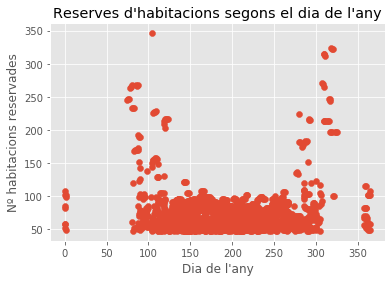

In [36]:
plt.title("Reserves d'habitacions segons el dia de l'any")
plt.xlabel("Dia de l'any")
plt.ylabel("Nº habitacions reservades")
plt.scatter(df1['diaAño'],df1['NHab'])

## Variables numèriques

### Preu mig

#### Anàlisi univariat

In [37]:
df1['PreuHab'].describe()

count    2260.000000
mean      101.354920
std        42.001822
min        40.312496
25%        69.303233
50%        93.743966
75%       123.755323
max       374.854553
Name: PreuHab, dtype: float64

Text(0.5, 1.0, 'Boxplot del preu mig')

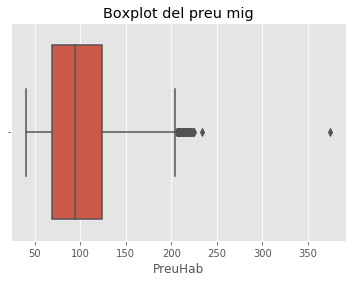

In [38]:
plt.title("Boxplot del preu mig")
plt.show(sns.boxplot(df1['PreuHab']))



Text(0.5, 1.0, 'Preu mig habitació')

Text(0.5, 0, 'Preu')

Text(0, 0.5, 'Recompte')

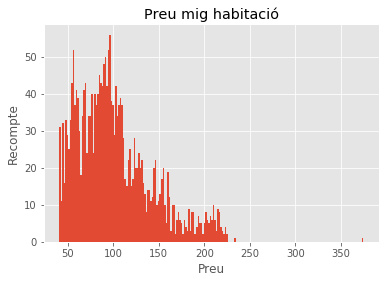

In [39]:
plt.title("Preu mig habitació")
plt.xlabel('Preu')
plt.ylabel('Recompte')
plt.show(plt.hist(df1['PreuHab'], bins = 200))

#### Anàlisi bivariat

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons el preu mig")

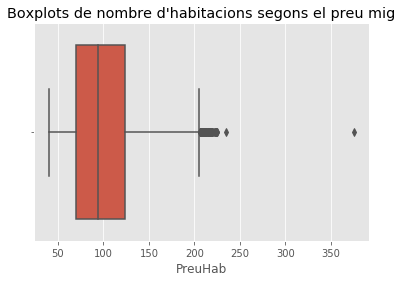

In [40]:
plt.title("Boxplots de nombre d'habitacions segons el preu mig")
plt.show(sns.boxplot(x="PreuHab", data=df1))


En general, els preus semblen força normals, no hi ha cap superior a 360. Per tant, un nombre elevat d'habitacions reservades no indica un augment del preu.

# Conclusions de l'apartat


Les diferències més detacables respecte a l'anàlisi descriptiu de les dades originals es troben en les següents variables. idcliente: l'agència TUI_UK_LTD augmenta del 17% al 73% en la respresentació de les dades. En concordància, ja que l'agència és anglesa, el país GB de la variable idpais_cliente també passa de representar un 42% de les dades a representar-ne un 75%.

Finalment, l'altre variable que pateix canvis significatius és la variable idsegmento, on en aquest anàlisi, el segment vacacional representa un 57% de les dades, mentre que en l'anàlisi original només representa un 20%. Que pel que hem vist, sembla que també va lligat a l'agència *TUI_UK_LTD*. Els que venen d'aquesta agència acostumen a recollir les dades per a segment vacacional.